In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")

## Loading in the song data

In [2]:
df = pd.read_csv("../input/spotifydata-19212020/data.csv")

df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [3]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Abstracting away relevant columns

In [4]:
song_data = df[["acousticness","danceability","energy","instrumentalness","key","liveness","loudness","speechiness","tempo","valence"]]

song_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.995,0.708,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790
1,0.994,0.379,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767
2,0.604,0.749,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800
3,0.995,0.781,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200
4,0.990,0.210,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693


## Plotting the correlation Matrix and further removal of columns from the dataset

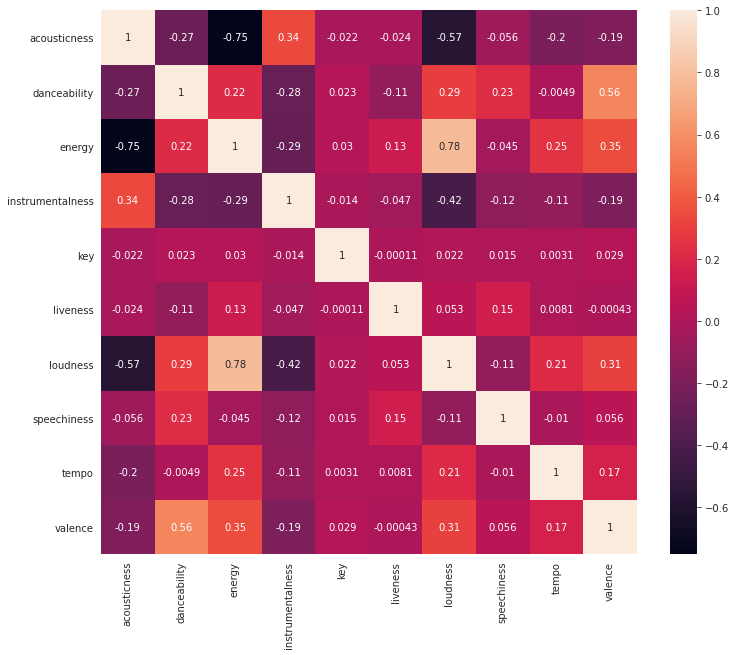

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(song_data.corr(),annot=True)
plt.show()

We see that  
$corr(Loudness,Energy)$ = 0,78 and $corr(Acousticness,Energy)$ = 0,75  

So, we can expect reasonably similar results if we remove Loudness and Acousticness from the classification algorithm - this will also make the algorithm faster. 

In [6]:
song_data.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [7]:
song_data = song_data[['danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'speechiness', 'tempo', 'valence']]

song_data.head()

,danceability,energy,instrumentalness,key,liveness,speechiness,tempo,valence
0,0.708,0.1950,0.563,10,0.1510,0.0506,118.469,0.7790
1,0.379,0.0135,0.901,8,0.0763,0.0462,83.972,0.0767
2,0.749,0.2200,0.000,5,0.1190,0.9290,107.177,0.8800
3,0.781,0.1300,0.887,1,0.1110,0.0926,108.003,0.7200
4,0.210,0.2040,0.908,11,0.0980,0.0424,62.149,0.0693


## Fit the song data to the KMeans Clustering Algorithm

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 1000,
               random_state= 42).fit(song_data)

In [9]:
predicted_song_data = song_data.copy(deep=True)

## Storing the labels assigned

In [10]:
predicted_song_data['predicted_label'] = kmeans.predict(predicted_song_data)

predicted_song_data.head()

,danceability,energy,instrumentalness,key,liveness,speechiness,tempo,valence,predicted_label
0,0.708,0.1950,0.563,10,0.1510,0.0506,118.469,0.7790,207
1,0.379,0.0135,0.901,8,0.0763,0.0462,83.972,0.0767,63
2,0.749,0.2200,0.000,5,0.1190,0.9290,107.177,0.8800,633
3,0.781,0.1300,0.887,1,0.1110,0.0926,108.003,0.7200,784
4,0.210,0.2040,0.908,11,0.0980,0.0424,62.149,0.0693,455


## Saving the model

In [12]:
import pickle

filename = "complexmodel.sav"
pickle.dump(kmeans, open(filename, 'wb'))